In [16]:
### import libraries and functions ###
library(dplyr)
library(tidyr)
library(ggplot2)
library(lubridate)
library(chisq.posthoc.test)

source('general_functions.R')

In [17]:
### load questionnaire data ###
# onboarding questionnaires
data_onboarding_groupassignment <- readRDS("data/questionnaires/data_onboarding_groupassignment.rds")
data_onboarding_baseline <- readRDS("data/questionnaires/data_onboarding_baseline.rds")
data_onboarding_transparency <- readRDS("data/questionnaires/data_onboarding_transparency.rds")
data_onboarding_control <- readRDS("data/questionnaires/data_onboarding_control.rds")
data_onboarding_both <- readRDS("data/questionnaires/data_onboarding_both.rds")

# pre and post questionnaires
data_startq <- readRDS("data/questionnaires/data_preq.rds")
data_postq <- readRDS("data/questionnaires/data_postq.rds")

In [18]:
### load app data ###
users <- readRDS("data/app/users.rds")

In [19]:
### Participation Rates. Amount of participants that ... ###

# For each stage, the participation rates depending on the four conditions are calculated

## ... showed interest in the study
n_assigned_ba <- nrow(data_onboarding_groupassignment %>% filter(RD01 == 1))
n_assigned_tr <- nrow(data_onboarding_groupassignment %>% filter(RD01 == 2))
n_assigned_co <- nrow(data_onboarding_groupassignment %>% filter(RD01 == 3))
n_assigned_bo <- nrow(data_onboarding_groupassignment %>% filter(RD01 == 4))

# ... completed the onboarding questionnaire
n_onboarding_finished_ba <- nrow(data_onboarding_baseline %>% filter(FINISHED == 1))
n_onboarding_finished_tr <- nrow(data_onboarding_transparency %>% filter(FINISHED == 1))
n_onboarding_finished_co <- nrow(data_onboarding_control %>% filter(FINISHED == 1))
n_onboarding_finished_bo <- nrow(data_onboarding_both %>% filter(FINISHED == 1))

# ... installed the app
n_appinst_ba = nrow(users %>% filter(condition=="baseline"))
n_appinst_tr = nrow(users %>% filter(condition=="transparency"))
n_appinst_co = nrow(users %>% filter(condition=="control"))
n_appinst_bo = nrow(users %>% filter(condition=="both"))

# ... completed the pre questionnaire
n_started_ba <- nrow(data_startq %>% filter(condition == "baseline"))
n_started_tr <- nrow(data_startq %>% filter(condition == "transparency"))
n_started_co <- nrow(data_startq %>% filter(condition == "control"))
n_started_bo <- nrow(data_startq %>% filter(condition == "both"))

# ...  kept app installed for at least one day
n_day1_ba = nrow(users %>% filter(condition=="baseline" & days_in_study >= ddays(1)))
n_day1_tr = nrow(users %>% filter(condition=="transparency" & days_in_study >= ddays(1)))
n_day1_co = nrow(users %>% filter(condition=="control" & days_in_study >= ddays(1)))
n_day1_bo = nrow(users %>% filter(condition=="both" & days_in_study >= ddays(1)))

# ... Kept app until study end
n_day6_ba = nrow(users %>% filter(condition=="baseline" & days_in_study >= ddays(6)))
n_day6_tr = nrow(users %>% filter(condition=="transparency" & days_in_study >= ddays(6)))
n_day6_co = nrow(users %>% filter(condition=="control" & days_in_study >= ddays(6)))
n_day6_bo = nrow(users %>% filter(condition=="both" & days_in_study >= ddays(6)))

# ... completed the post questionnaire
n_finished_ba <- nrow(data_postq %>% filter(condition == "baseline")) 
n_finished_tr <- nrow(data_postq %>% filter(condition == "transparency"))
n_finished_co <- nrow(data_postq %>% filter(condition == "control"))
n_finished_bo <- nrow(data_postq %>% filter(condition == "both"))

In [20]:
# Table 3
df_table3 <- data.frame(
  baseline_n = c(n_assigned_ba,n_onboarding_finished_ba,n_appinst_ba,n_day1_ba,n_day6_ba),
  baseline_perc = c(1,n_onboarding_finished_ba/n_assigned_ba,n_appinst_ba/n_onboarding_finished_ba,n_day1_ba/n_appinst_ba,n_day6_ba/n_day1_ba),
  transparency_n = c(n_assigned_tr,n_onboarding_finished_tr,n_appinst_tr,n_day1_tr,n_day6_tr),
  transparency_perc = c(1,n_onboarding_finished_tr/n_assigned_tr,n_appinst_tr/n_onboarding_finished_tr,n_day1_tr/n_appinst_tr,n_day6_tr/n_day1_tr),
  control_n = c(n_assigned_co,n_onboarding_finished_co,n_appinst_co,n_day1_co,n_day6_co),
  control_perc = c(1,n_onboarding_finished_co/n_assigned_co,n_appinst_co/n_onboarding_finished_co,n_day1_co/n_appinst_co,n_day6_co/n_day1_co),
  both_n = c(n_assigned_bo,n_onboarding_finished_bo,n_appinst_bo,n_day1_bo,n_day6_bo),
  both_perc = c(1,n_onboarding_finished_bo/n_assigned_bo,n_appinst_bo/n_onboarding_finished_bo,n_day1_bo/n_appinst_bo,n_day6_bo/n_day1_bo),
  total_n = c(n_assigned_ba+n_assigned_tr+n_assigned_co+n_assigned_bo,
              n_onboarding_finished_ba+n_onboarding_finished_tr+n_onboarding_finished_co+n_onboarding_finished_bo,
              n_appinst_ba+n_appinst_tr+n_appinst_co+n_appinst_bo,
              n_day1_ba+n_day1_tr+n_day1_co+n_day1_bo,
              n_day6_ba+n_day6_tr+n_day6_co+n_day6_bo),
  total_perc = c(1,
                 (n_onboarding_finished_ba+n_onboarding_finished_tr+n_onboarding_finished_co+n_onboarding_finished_bo)/(n_assigned_ba+n_assigned_tr+n_assigned_co+n_assigned_bo),
                 (n_appinst_ba+n_appinst_co+n_appinst_bo+n_appinst_tr)/(n_onboarding_finished_ba+n_onboarding_finished_tr+n_onboarding_finished_co+n_onboarding_finished_bo),
                 (n_day1_ba+n_day1_bo+n_day1_co+n_day1_tr)/(n_appinst_ba+n_appinst_co+n_appinst_bo+n_appinst_tr),
                 (n_day6_ba+n_day6_bo+n_day6_co+n_day6_tr)/(n_day1_ba+n_day1_bo+n_day1_co+n_day1_tr)
                 )
  )

View(df_table3)

baseline_n,baseline_perc,transparency_n,transparency_perc,control_n,control_perc,both_n,both_perc,total_n,total_perc
<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>
322,1.0000000,321,1.0000000,322,1.0000000,321,1.0000000,1286,1.0000000
56,0.1739130,57,0.1775701,51,0.1583851,63,0.1962617,227,0.1765163
38,0.6785714,27,0.4736842,43,0.8431373,42,0.6666667,150,0.6607930
29,0.7631579,23,0.8518519,38,0.8837209,38,0.9047619,128,0.8533333
29,1.0000000,23,1.0000000,37,0.9736842,37,0.9736842,126,0.9843750


In [10]:
### Tests: Differences in participation and dropout between the four study conditions ###
## (section 6.1 paragraph 2)

## Interst in Study -> Indicated Participation
mat_onboarding <- matrix(c(n_onboarding_finished_ba, 
                           n_onboarding_finished_tr,
                           n_onboarding_finished_co,
                           n_onboarding_finished_bo,
                        max(0,n_assigned_ba-n_onboarding_finished_ba), 
                        max(0,n_assigned_tr-n_onboarding_finished_tr),
                        max(0,n_assigned_co-n_onboarding_finished_co),
                        max(0,n_assigned_bo-n_onboarding_finished_bo)
                ), ncol=2)
colnames(mat_onboarding) <- c("Onboarded","Aborted")
row.names(mat_onboarding) <- c("baseline","transparency","control","both")
test_onboarding <- chisq.test(as.table(mat_onboarding), correct = FALSE)
print("Significance Test for differences in participation: Interst in Study -> Indicated Participation")
print(test_onboarding)

[1] "Significance Test for differences in participation: Interst in Study -> Indicated Participation"

	Pearson's Chi-squared test

data:  as.table(mat_onboarding)
X-squared = 1.6067, df = 3, p-value = 0.6579



In [11]:
## Indicated Participation -> App Installed
mat_onbq_appinst <- matrix(c(n_appinst_ba, 
                        n_appinst_tr,
                        n_appinst_co,
                        n_appinst_bo,
                        max(0,n_onboarding_finished_ba-n_appinst_ba), 
                        max(0,n_onboarding_finished_tr-n_appinst_tr),
                        max(0,n_onboarding_finished_co-n_appinst_co),
                        max(0,n_onboarding_finished_bo-n_appinst_bo)
), ncol=2)
colnames(mat_onbq_appinst) <- c("App Installed","App Not Installed")
row.names(mat_onbq_appinst) <- c("baseline","transparency","control","both")

print("Significance Test for differences in participation: Indicated Participation -> App Installed")
chi_sq_test("Indicated Participation -> App Installed", mat_onbq_appinst)

[1] "Significance Test for differences in participation: Indicated Participation -> App Installed"

	Pearson's Chi-squared test

data:  as.table(mat)
X-squared = 16.557, df = 3, p-value = 0.0008716

[1] "Onboarding Q finished -> App Inst : Significant relation found with p= 0.000871641628754211"
[1] "Onboarding Q finished -> App Inst : Variables in the following table whose magnitude is higher than -2.73436878653318 occured significantly more/less often"
     Dimension     Value App Installed App Not Installed
1     baseline Residuals     0.3237713        -0.3237713
2     baseline  p values     1.0000000         1.0000000
3 transparency Residuals    -3.4479014         3.4479014
4 transparency  p values     0.0045200         0.0045200
5      control Residuals     3.1236959        -3.1236959
6      control  p values     0.0142880         0.0142880
7         both Residuals     0.1158535        -0.1158535
8         both  p values     1.0000000         1.0000000


In [12]:
## App Installed -> Kept app installed for at least one day
mat_inst_day1 <- matrix(c(n_day1_ba, 
                          n_day1_tr,
                          n_day1_co,
                          n_day1_bo,
                          max(0,n_appinst_ba-n_day1_ba), 
                          max(0,n_appinst_tr-n_day1_tr),
                          max(0,n_appinst_co-n_day1_co),
                          max(0,n_appinst_bo-n_day1_bo)
), ncol=2)
colnames(mat_inst_day1) <- c("App 1+ day","App less than 1 day")
row.names(mat_inst_day1) <- c("baseline","transparency","control","both")
test_inst_day1 <- chisq.test(as.table(mat_inst_day1), correct = FALSE)
print("Significance Test for differences in participation: App Installed -> Kept app installed for at least one day")
print(test_inst_day1)


Warning message in chisq.test(as.table(mat_inst_day1), correct = FALSE):
"Chi-squared approximation may be incorrect"


[1] "Significance Test for differences in participation: App Installed -> Kept app installed for at least one day"

	Pearson's Chi-squared test

data:  as.table(mat_inst_day1)
X-squared = 3.6742, df = 3, p-value = 0.2989



In [13]:
## Kept app installed for at least one day -> Kept app until study end
n_day6_ba = nrow(users %>% filter(condition=="baseline" & days_in_study >= ddays(6)))
n_day6_tr = nrow(users %>% filter(condition=="transparency" & days_in_study >= ddays(6)))
n_day6_co = nrow(users %>% filter(condition=="control" & days_in_study >= ddays(6)))
n_day6_bo = nrow(users %>% filter(condition=="both" & days_in_study >= ddays(6)))
mat_day1_day6 <- matrix(c(n_day6_ba, 
                          n_day6_tr,
                          n_day6_co,
                          n_day6_bo,
                          max(0,n_day1_ba-n_day6_ba), 
                          max(0,n_day1_tr-n_day6_tr),
                          max(0,n_day1_co-n_day6_co),
                          max(0,n_day1_bo-n_day6_bo)
), ncol=2)
colnames(mat_day1_day6) <- c("App 6+ day","App less than 6 day")
row.names(mat_day1_day6) <- c("baseline","transparency","control","both")
print("Significance Test for differences in participation: Kept app installed for at least one day -> Kept app until study end")
chi_sq_test("Kept app installed for at least one day -> Kept app until study end",mat_day1_day6)

[1] "Significance Test for differences in participation: Kept app installed for at least one day -> Kept app until study end"


Warning message in chisq.test(as.table(mat), correct = FALSE):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  as.table(mat)
X-squared = 1.3901, df = 3, p-value = 0.7078

[1] "Kept app installed for at least one day -> Kept app until study end : No significant relation found"


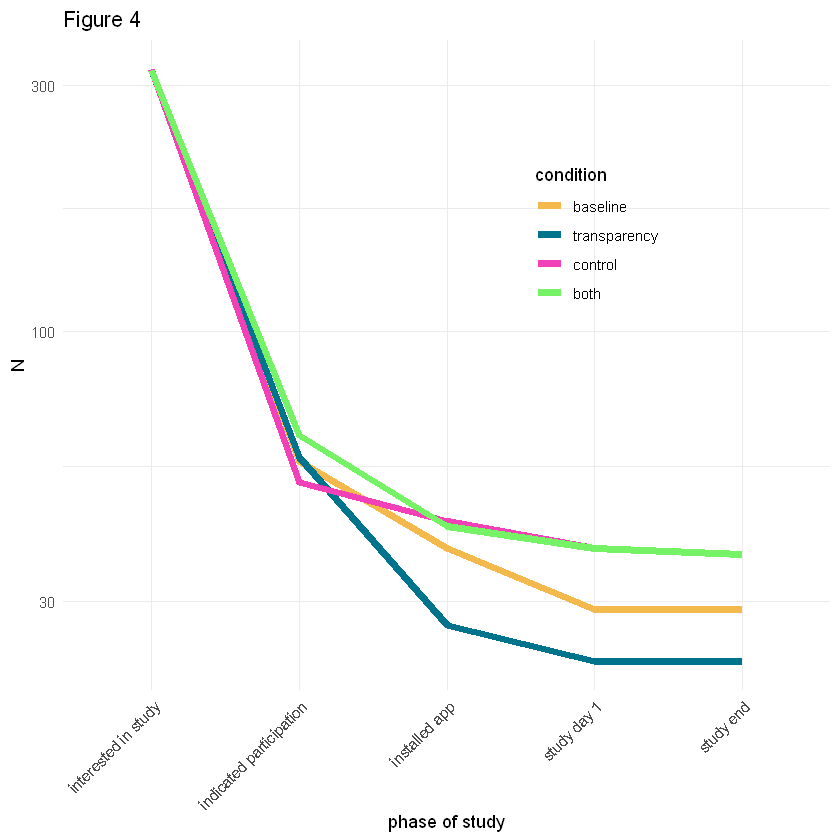

In [29]:
## Chart: Study Progress (Figure 4)
df_studyprogress <- data.frame(studyprogress = factor(c("interested in study",
                                    "interested in study",
                                    "interested in study",
                                    "interested in study",
                                    "indicated participation",
                                    "indicated participation",
                                    "indicated participation",
                                    "indicated participation",
                                    "installed app",
                                    "installed app",
                                    "installed app",
                                    "installed app",
                                    "study day 1",
                                    "study day 1",
                                    "study day 1",
                                    "study day 1",                                 
                                    "study end",
                                    "study end",
                                    "study end",
                                    "study end"
                                    ), levels=c("interested in study","indicated participation","installed app","study day 1","study end")), # this defines the order on the x axis
                 condition = factor(c("baseline", 
                               "transparency",
                               "control",
                               "both",
                               "baseline", 
                               "transparency",
                               "control",
                               "both",
                               "baseline", 
                               "transparency",
                               "control",
                               "both",
                               "baseline", 
                               "transparency",
                               "control",
                               "both",
                               "baseline", 
                               "transparency",
                               "control",
                               "both"),levels=c("baseline","transparency","control","both")),
                 N = c(n_assigned_ba,
                       n_assigned_tr,
                       n_assigned_co,
                       n_assigned_bo,
                       n_onboarding_finished_ba,
                       n_onboarding_finished_tr,
                       n_onboarding_finished_co,
                       n_onboarding_finished_bo,
                       n_appinst_ba,
                       n_appinst_tr,
                       n_appinst_co,
                       n_appinst_bo,
                       n_day1_ba,
                       n_day1_tr,
                       n_day1_co,
                       n_day1_bo,                
                       n_day6_ba,
                       n_day6_tr,
                       n_day6_co,
                       n_day6_bo
                       )
)

ggplot(
  data=data.frame(df_studyprogress), 
  aes(x = studyprogress, y = N, color = condition, group=condition)
  ) + 
  geom_line(size = 2)+
  scale_color_manual(values=c('#f3b94d','#00748d','#F241B8','#76F266'))+
  theme_minimal()+
  labs(x="phase of study",y="N", title="Figure 4")+
  scale_y_continuous(trans='log10') +
  theme(
    axis.text.x = element_text(angle = 45, hjust=1),
    legend.position = c(.7, .7)
    )

`summarise()` ungrouping output (override with `.groups` argument)

Joining, by = "username"

Warning message:
"Removed 4 rows containing missing values (geom_bar)."


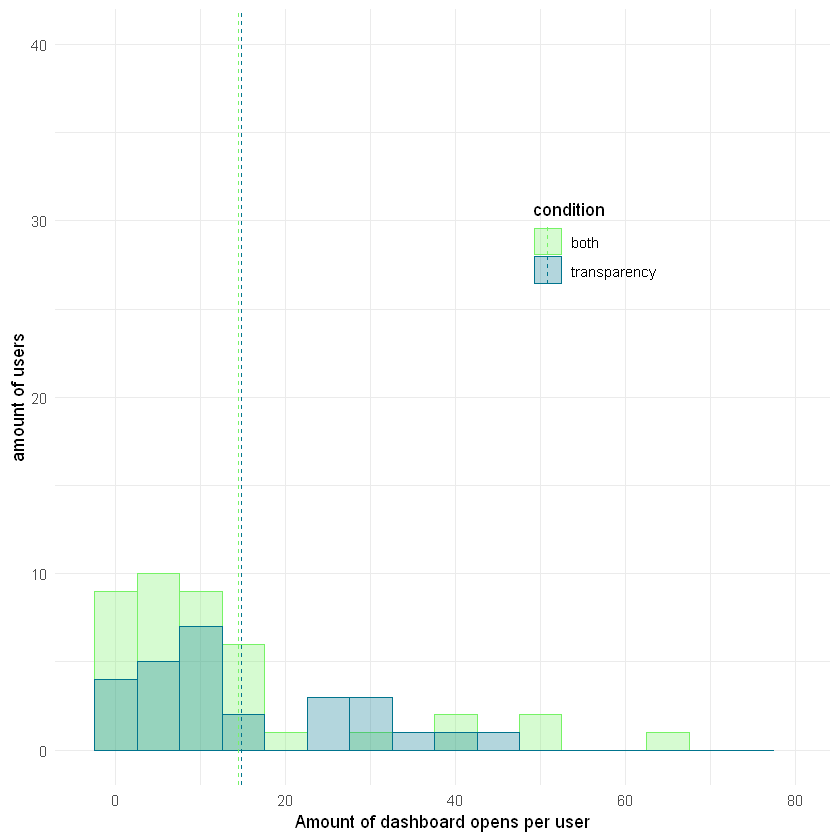

In [28]:
### Usage of the Privacy Dashboard
## import
ps_dashboard_usage <- readRDS('data/app/ps_dashboard_usage.rds')

## How is the usage distributed across the participants?
ps_dashboard_usage_counts <- ps_dashboard_usage %>% 
  filter(dashboard_event == "DASHBOARD_OPENED") %>%
  filter(condition %in% c("transparency","both")) %>%
  group_by(username) %>%
  dplyr::summarize(count=n()) %>%
  dplyr::right_join(users %>% select(username,condition) %>% filter(condition %in% c("transparency","both"))) %>%
  mutate(count = ifelse(is.na(count), 0, count)) %>%
   mutate(transparency = condition %in% c("transparency","both"), control = condition %in% c("control","both"))

library(plyr)
mu <- ps_dashboard_usage_counts %>% ddply("condition", summarise, grp.mean=mean(count))
 
## Figure 5a
ggplot(data = ps_dashboard_usage_counts, aes(x = count, fill=condition, color=condition)) +
  geom_histogram(binwidth = 5, alpha=0.3, position="identity") +
  theme_minimal() + 
  labs(y = "amount of users", x = "Amount of dashboard opens per user")+
  scale_fill_manual(values=c('#76F266','#00748d'))+
  scale_color_manual(values=c('#76F266','#00748d'))+
  # add mean line
  geom_vline(data=mu, aes(xintercept=grp.mean, color=condition),
             linetype="dashed")+
    xlim(-3,80)+
  ylim(0,40)+
    theme(
    legend.position = c(.7, .7)
    )

`summarise()` ungrouping output (override with `.groups` argument)

Joining, by = "username"

Warning message:
"Removed 4 rows containing missing values (geom_bar)."


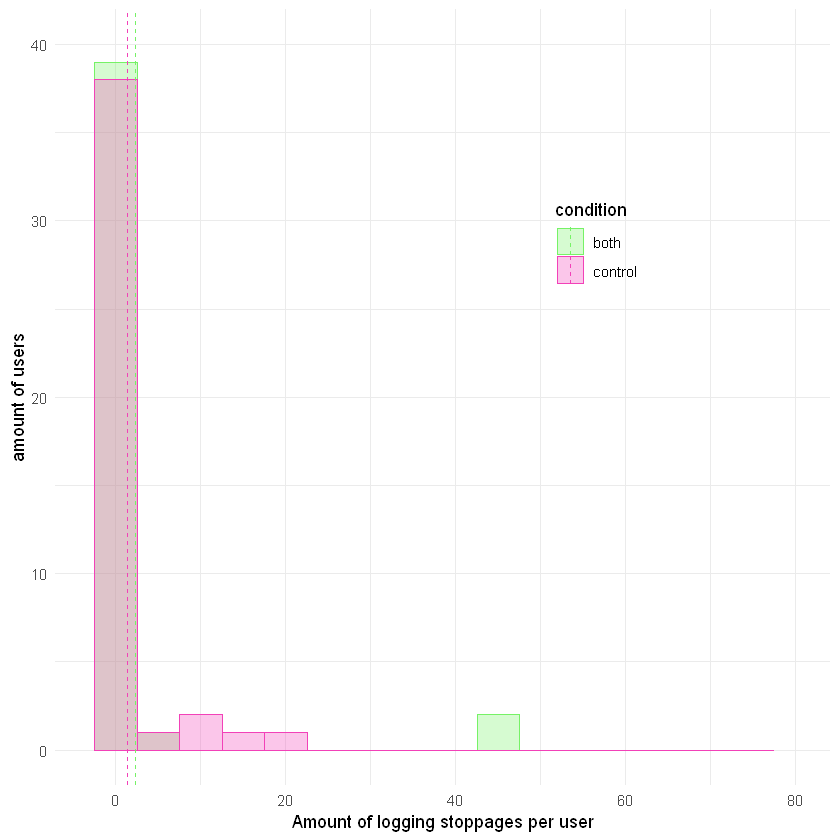

In [22]:
### Usage of Control features
psusage <- readRDS("data/app/ps_usage.rds") # TODO file

ps_control_usage_counts <- psusage %>% 
  filter(event == "logging-feature-status-changed") %>%
  filter(condition %in% c("control","both")) %>%
  group_by(username) %>%
  dplyr::summarize(count=n()) %>%
  dplyr::right_join(users %>% select(username,condition) %>% filter(condition %in% c("control","both"))) %>%
  mutate(count = ifelse(is.na(count), 0, count))
  
library(plyr)
mu2 <- ps_control_usage_counts %>% ddply("condition", summarise, grp.mean=mean(count))
 
# Figure 5b
ggplot(data = ps_control_usage_counts, aes(x = count, fill=condition, color=condition)) +
  geom_histogram(binwidth = 5, alpha=0.3, position="identity") +
  theme_minimal() + 
  labs(y = "amount of users", x = "Amount of logging stoppages per user")+
  scale_fill_manual(values=c('#76F266','#F241B8'))+
  scale_color_manual(values=c('#76F266','#F241B8'))+
  # add mean line
  geom_vline(data=mu2, aes(xintercept=grp.mean, color=condition),
             linetype="dashed")+
  xlim(-3,80)+
  ylim(0,40)+
    theme(
    legend.position = c(.7, .7)
    )

In [30]:
### Tests: Differences in the usage of Transparency features between the four study conditions ###
## (section 6.1 paragraph 3)
# independent samples t test
independent_samples_t_test(
    ps_dashboard_usage_counts %>% 
    filter(condition == "transparency") %>% 
    .$count, ps_dashboard_usage_counts %>% 
    filter(condition == "both") %>% 
    .$count, ps_dashboard_usage_counts
)


Warning message in leveneTest.default(y = y, group = group, ...):
"group coerced to factor."


[1] "is normally distributed:  FALSE , has equal variances:  TRUE"
[1] "continuing with Mann-Whitney U Test"


Warning message in wilcox.test.default(df1, df2):
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  df1 and df2
W = 631.5, p-value = 0.4301
alternative hypothesis: true location shift is not equal to 0



In [31]:
### Tests: Differences in the usage of Control features between the four study conditions ###
## (section 6.1 paragraph 4)
# independent samples t test
independent_samples_t_test(
    ps_control_usage_counts %>% 
    filter(condition == "control") %>% 
    .$count, ps_control_usage_counts %>% 
    filter(condition == "both") %>% 
    .$count, ps_control_usage_counts
)

Warning message in leveneTest.default(y = y, group = group, ...):
"group coerced to factor."


[1] "is normally distributed:  FALSE , has equal variances:  TRUE"
[1] "continuing with Mann-Whitney U Test"


Warning message in wilcox.test.default(df1, df2):
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  df1 and df2
W = 960, p-value = 0.3945
alternative hypothesis: true location shift is not equal to 0



In [32]:
### Section 6.2: Logging Awareness and Understanding
## 6.2.1 Data Understanding
### Data Understanding (Nachher)
library(viridis)

# two way anova (see R Console)
df <- data_postq %>% select(condition,transparency,control,data_understanding_v2) %>% filter(!is.na(data_understanding_v2))
twoway_anova_test("Test Items: Data Understanding", df,"data_understanding_v2")

#### Data Understanding - vorher nachher Vergleich
library(viridis)
data_q_prepost <- data_postq %>% 
  dplyr::rename(data_understanding_e=data_understanding_v2) %>%
  inner_join(data_startq %>% select(username,data_understanding_v2) %>% dplyr::rename(data_understanding_s=data_understanding_v2),by=c("username")) %>%
  mutate(data_understanding_diff = data_understanding_e-data_understanding_s)



# two way anova (see R Console)
df <- data_q_prepost %>% select(condition,transparency,control,data_understanding_diff) %>% filter(!is.na(data_understanding_diff))
twoway_anova_test("Test Items: Data Understanding", df,"data_understanding_diff")


[1] "sample is not normally distributed, continuing with Sven's special anova test (ARTool)"


,Term,Df,Df.res,Sum Sq,Sum Sq.res,F value,Pr(>F)
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,transparency,1,114,13728.4969,122096.8,12.8180987,0.0005056755
2,control,1,114,3090.6956,130856.2,2.6925688,0.1035734073
3,transparency:control,1,114,177.7875,132568.3,0.1528855,0.6965227392


[1] "sample is not normally distributed, continuing with Sven's special anova test (ARTool)"


,Term,Df,Df.res,Sum Sq,Sum Sq.res,F value,Pr(>F)
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,transparency,1,112,3448.6025,123191.3,3.1353157,0.0793341
2,control,1,112,1925.4024,126353.9,1.7066749,0.1940938
3,transparency:control,1,112,574.6826,127236.4,0.5058649,0.4784131


In [13]:
### Data Understanding + Knowledge: Table 4

data.frame(
  "Subject" = c("Pre-Study Questionnaire [0;10]","Post-Study Questionnaire [0;10]","Difference Before/After [-10;10]"),
  Baseline = c(
    (data_startq %>% filter(condition=="baseline") %>% summarize(mean=mean(data_understanding_v2)))$mean,
    (data_postq %>% filter(condition=="baseline") %>% summarize(mean=mean(data_understanding_v2,na.rm=TRUE)))$mean,
    (data_q_prepost %>% filter(condition=="baseline") %>% summarize(mean=mean(data_understanding_diff,na.rm=TRUE)))$mean
    ),
   Transparency = c(
    (data_startq %>% filter(condition=="transparency") %>% summarize(mean=mean(data_understanding_v2)))$mean,
    (data_postq %>% filter(condition=="transparency") %>% summarize(mean=mean(data_understanding_v2,na.rm=TRUE)))$mean,
    (data_q_prepost %>% filter(condition=="transparency") %>% summarize(mean=mean(data_understanding_diff,na.rm=TRUE)))$mean
    ),
   Control = c(
    (data_startq %>% filter(condition=="control") %>% summarize(mean=mean(data_understanding_v2)))$mean,
    (data_postq %>% filter(condition=="control") %>% summarize(mean=mean(data_understanding_v2,na.rm=TRUE)))$mean,
    (data_q_prepost %>% filter(condition=="control") %>% summarize(mean=mean(data_understanding_diff,na.rm=TRUE)))$mean
    ),
   Both = c(
    (data_startq %>% filter(condition=="both") %>% summarize(mean=mean(data_understanding_v2)))$mean,
    (data_postq %>% filter(condition=="both") %>% summarize(mean=mean(data_understanding_v2,na.rm=TRUE)))$mean,
    (data_q_prepost %>% filter(condition=="both") %>% summarize(mean=mean(data_understanding_diff,na.rm=TRUE)))$mean
    )
)

data.frame(
  "Subject" = c("Pre-Study Questionnaire [0;10]","Post-Study Questionnaire [0;10]","Difference Before/After [-10;10]"),
  Baseline = c(
    (data_startq %>% filter(condition=="baseline") %>% summarize(mean=mean(logging_awareness_v2)))$mean,
    (data_postq %>% filter(condition=="baseline") %>% summarize(mean=mean(logging_awareness_v2,na.rm=TRUE)))$mean,
    (data_q_prepost %>% filter(condition=="baseline") %>% summarize(mean=mean(logging_awareness_v2,na.rm=TRUE)))$mean
    ),
   Transparency = c(
    (data_startq %>% filter(condition=="transparency") %>% summarize(mean=mean(logging_awareness_v2)))$mean,
    (data_postq %>% filter(condition=="transparency") %>% summarize(mean=mean(logging_awareness_v2,na.rm=TRUE)))$mean,
    (data_q_prepost %>% filter(condition=="transparency") %>% summarize(mean=mean(logging_awareness_v2,na.rm=TRUE)))$mean
    ),
   Control = c(
    (data_startq %>% filter(condition=="control") %>% summarize(mean=mean(logging_awareness_v2)))$mean,
    (data_postq %>% filter(condition=="control") %>% summarize(mean=mean(logging_awareness_v2,na.rm=TRUE)))$mean,
    (data_q_prepost %>% filter(condition=="control") %>% summarize(mean=mean(logging_awareness_v2,na.rm=TRUE)))$mean
    ),
   Both = c(
    (data_startq %>% filter(condition=="both") %>% summarize(mean=mean(logging_awareness_v2)))$mean,
    (data_postq %>% filter(condition=="both") %>% summarize(mean=mean(logging_awareness_v2,na.rm=TRUE)))$mean,
    (data_q_prepost %>% filter(condition=="both") %>% summarize(mean=mean(logging_awareness_v2,na.rm=TRUE)))$mean
    )
)

Subject,Baseline,Transparency,Control,Both
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Pre-Study Questionnaire [0;10],6.5517241,7.9090909,6.5405405,8.0833333
Post-Study Questionnaire [0;10],6.6296296,7.1304348,7.2058824,8.4411765
Difference Before/After [-10;10],0.2962963,-0.8181818,0.5588235,0.3333333


Subject,Baseline,Transparency,Control,Both
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Pre-Study Questionnaire [0;10],5.724138,6.272727,6.054054,5.833333
Post-Study Questionnaire [0;10],6.259259,6.608696,6.500000,6.558824
Difference Before/After [-10;10],6.259259,6.454545,6.500000,6.575758


In [33]:
## 6.2.2 Logging Knowledge

data_q_prepost <- data_postq %>% 
  dplyr::rename(logging_knowledge_e=logging_awareness_v2) %>%
  inner_join(data_startq %>% select(username,logging_awareness_v2) %>% dplyr::rename(logging_knowledge_s=logging_awareness_v2),by=c("username")) %>%
  mutate(logging_knowledge_diff = logging_knowledge_e-logging_knowledge_s)


# two way anova (see R Console)
df <- data_q_prepost %>% select(condition,transparency,control,logging_knowledge_diff) %>% filter(!is.na(logging_knowledge_diff))
twoway_anova_test("Test Items: Logging Knowledge Diff", df,"logging_knowledge_diff")


[1] "sample is not normally distributed, continuing with Sven's special anova test (ARTool)"


,Term,Df,Df.res,Sum Sq,Sum Sq.res,F value,Pr(>F)
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,transparency,1,112,116.4914,129416.2,0.1008145,0.7514455
2,control,1,112,393.1843,128959.6,0.3414762,0.5601536
3,transparency:control,1,112,1952.4838,126214.4,1.7325937,0.1907675


In [35]:
## 6.3 Behavior Change and Self Reflection
library(likert)
data2 <- data_postq %>% 
  select(condition,transparency,control,starts_with("BC01_")) %>%
  filter(!is.na(BC01_04)) %>%
  mutate(condition= ifelse(condition=="baseline","Baseline",ifelse(condition=="transparency","Transparency Features",ifelse(condition=="control","Control Features",ifelse(condition=="both","Both",condition))))) %>%
  mutate_all(as.factor)


names(data2) <- c("condition", "transparency","control",
                         "(1) I learned new things about myself", # 1. habe ich Neues über mich gelernt
                         "(2) I learned new things about my behavior", # 2. habe ich Neues über mein Verhalten gelernt
                         "(3) I have changed my smartphone usage", # 3. habe ich meine Smartphone Nutzung verändert
                         "(4) I have changed my behavior") # 4. habe ich mein Verhalten verändert

data2 <- as.data.frame(data2)


fdaff_likert3 <- likert(items=data2[,4:7], grouping=data2[,1])
pdf("fdaff_likert3.pdf")
plot(fdaff_likert3)

# two way anova (see R Console)
data <- data2 %>% 
  dplyr::rename(item1 = "(1) I learned new things about myself") %>%
  mutate(item1=as.numeric(item1))
twoway_anova_test("Self-Reflection Item 1", data,"item1") 

data <- data2 %>% 
  dplyr::rename(item1 = "(2) I learned new things about my behavior") %>%
  mutate(item1=as.numeric(item1))# 
twoway_anova_test("Self-Reflection Item 2", data,"item1") 

data <- data2 %>% 
  dplyr::rename(item1 = "(3) I have changed my smartphone usage") %>% 
  mutate(item1=as.numeric(item1))# # 
twoway_anova_test("Self-Reflection Item 3", data,"item1") 

data <- data2 %>% 
  dplyr::rename(item1 = "(4) I have changed my behavior") %>%
   mutate(item1=as.numeric(item1))# # 
twoway_anova_test("Self-Reflection Item 4", data,"item1") 


### Kolomogorv Smirnov Test
data_x = data2 %>% filter(condition == "baseline") %>% .$`1. habe ich Neues über mich gelernt`
data_y = data2 %>% filter(condition == "transparency") %>% .$`1. habe ich Neues über mich gelernt`
ks.test(x = as.numeric(data_x), y = as.numeric(data_y), alternative = c("two.sided", "less", "greater"),
        exact = NULL)

Warning message:
"package 'likert' was built under R version 3.6.3"
Loading required package: xtable


Attaching package: 'likert'


The following object is masked from 'package:car':

    recode


The following object is masked from 'package:dplyr':

    recode




[1] "sample is normally distributed, continuing with standard anova"


                      Df Sum Sq Mean Sq F value Pr(>F)
transparency           1   0.35   0.347   0.137  0.712
control                1   0.08   0.075   0.030  0.863
transparency:control   1   3.90   3.898   1.543  0.217
Residuals            111 280.41   2.526               

[1] "sample is normally distributed, continuing with standard anova"


                      Df Sum Sq Mean Sq F value Pr(>F)  
transparency           1   0.00   0.002   0.001 0.9775  
control                1   0.63   0.627   0.227 0.6344  
transparency:control   1   9.90   9.904   3.590 0.0607 .
Residuals            111 306.21   2.759                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

[1] "sample is normally distributed, continuing with standard anova"


                      Df Sum Sq Mean Sq F value Pr(>F)
transparency           1   1.22  1.2234   0.475  0.492
control                1   2.46  2.4615   0.957  0.330
transparency:control   1   0.44  0.4355   0.169  0.682
Residuals            111 285.65  2.5735               

[1] "sample is normally distributed, continuing with standard anova"


                      Df Sum Sq Mean Sq F value Pr(>F)
transparency           1   1.48  1.4835   0.677  0.412
control                1   1.93  1.9251   0.879  0.351
transparency:control   1   0.06  0.0551   0.025  0.874
Residuals            111 243.11  2.1902               

ERROR: Error in ks.test(x = as.numeric(data_x), y = as.numeric(data_y), alternative = c("two.sided", : not enough 'x' data


[1] "sample is not normally distributed, continuing with Sven's special anova test (ARTool)"


,Term,Df,Df.res,Sum Sq,Sum Sq.res,F value,Pr(>F)
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,transparency,1,111,1180.1716,125084.1,1.0472878,0.30835771
2,control,1,111,578.0755,125655.6,0.5106527,0.47635661
3,transparency:control,1,111,3117.6686,122289.6,2.8298507,0.09533813


[1] "sample is not normally distributed, continuing with Sven's special anova test (ARTool)"


,Term,Df,Df.res,Sum Sq,Sum Sq.res,F value,Pr(>F)
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,transparency,1,111,2696.9390,123766.1,2.4187570,0.12273670
2,control,1,111,461.8008,125729.6,0.4076996,0.52445465
3,transparency:control,1,111,3228.0296,123239.3,2.9074434,0.09096871


[1] "sample is not normally distributed, continuing with Sven's special anova test (ARTool)"


,Term,Df,Df.res,Sum Sq,Sum Sq.res,F value,Pr(>F)
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,transparency,1,111,405.74906,120865.4,0.37263052,0.5428217
2,control,1,111,470.57434,121356.5,0.43041571,0.5131427
3,transparency:control,1,111,19.83191,121835.7,0.01806812,0.8933157


[1] "sample is not normally distributed, continuing with Sven's special anova test (ARTool)"


,Term,Df,Df.res,Sum Sq,Sum Sq.res,F value,Pr(>F)
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,transparency,1,111,502.2072,116022.1,0.4804687,0.4896579
2,control,1,111,1003.6112,110937.7,1.0041751,0.3184819
3,transparency:control,1,111,13.3023,118491.3,0.0124613,0.9113183


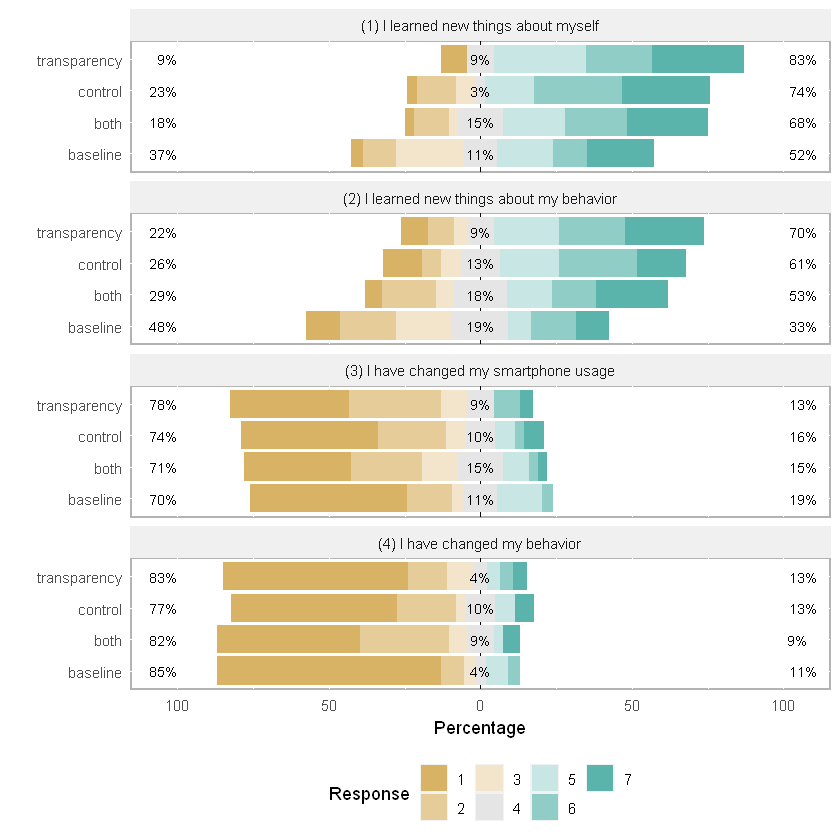

In [10]:
# 6.3 Figure 6 on Self-Reflection and Behavior Change

library(likert)
library(dplyr)
#data_postq <- readRDS("data_postq.rds")
source('general_functions.R')

data1 <- data_postq %>% 
  select(condition,transparency,control,starts_with("LB01_")) %>%
  filter(!is.na(LB01_04)) %>%
  mutate_all(as.factor)


names(data1) <- c("condition", "transparency","control",
                         "(1) I learned new things about myself", 
                         "(2) I learned new things about my behavior",
                         "(3) I have changed my smartphone usage",
                         "(4) I have changed my behavior")

data1 <- as.data.frame(data1)


fdaff_likert3 <- likert(items=data1[,4:7], grouping=data1[,1])
plot(fdaff_likert3)

# two way anova (see R Console)
data <- data1 %>% dplyr::rename(item1 = "(1) I learned new things about myself")
twoway_anova_test("Wie bewusst war den Leuten, was die PhoneStudy App tut? Item 1", data,"item1") 

data <- data1 %>% rename(item1 = "(2) I learned new things about my behavior")
twoway_anova_test("Wie bewusst war den Leuten, was die PhoneStudy App tut? Item 2", data,"item1") 

data <- data1 %>% rename(item1 = "(3) I have changed my smartphone usage")
twoway_anova_test("Wie bewusst war den Leuten, was die PhoneStudy App tut? Item 3", data,"item1") 

data <- data1 %>% rename(item1 = "(4) I have changed my behavior")
twoway_anova_test("Wie bewusst war den Leuten, was die PhoneStudy App tut? Item 4", data,"item1") 

[1] "sample is normally distributed, continuing with standard anova"


                      Df Sum Sq Mean Sq F value  Pr(>F)   
transparency           1    119   119.1   2.598 0.10966   
control                1    429   429.1   9.358 0.00275 **
transparency:control   1    123   122.8   2.679 0.10439   
Residuals            117   5365    45.9                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

[1] "sample is not normally distributed, continuing with Sven's special anova test (ARTool)"


,Term,Df,Df.res,Sum Sq,Sum Sq.res,F value,Pr(>F)
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,transparency,1,117,5.240303,147435.2,0.004158543,0.94869269
2,control,1,117,4523.951820,142709.7,3.708944625,0.05654804
3,transparency:control,1,117,1422.884846,146006.7,1.140204548,0.28780738


[1] "sample is normally distributed, continuing with standard anova"


                      Df Sum Sq Mean Sq F value Pr(>F)  
transparency           1    5.4    5.43   0.374  0.542  
control                1   28.0   27.97   1.928  0.168  
transparency:control   1   41.3   41.35   2.850  0.094 .
Residuals            117 1697.5   14.51                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

[1] "sample is not normally distributed, continuing with Sven's special anova test (ARTool)"


,Term,Df,Df.res,Sum Sq,Sum Sq.res,F value,Pr(>F)
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,transparency,1,117,1027.731,145923.7,0.8240237,0.365872259
2,control,1,117,4156.837,142604.5,3.4104818,0.067310467
3,transparency:control,1,117,10922.556,135360.7,9.4409880,0.002639999


[1] "sample is not normally distributed, continuing with Sven's special anova test (ARTool)"


,Term,Df,Df.res,Sum Sq,Sum Sq.res,F value,Pr(>F)
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,transparency,1,117,1386.315,145626.4,1.113802,0.29343148
2,control,1,117,3899.547,143488.6,3.179673,0.07715262
3,transparency:control,1,117,2341.939,144962.7,1.890188,0.17180795


`summarise()` regrouping output by 'itemgroup' (override with `.groups` argument)



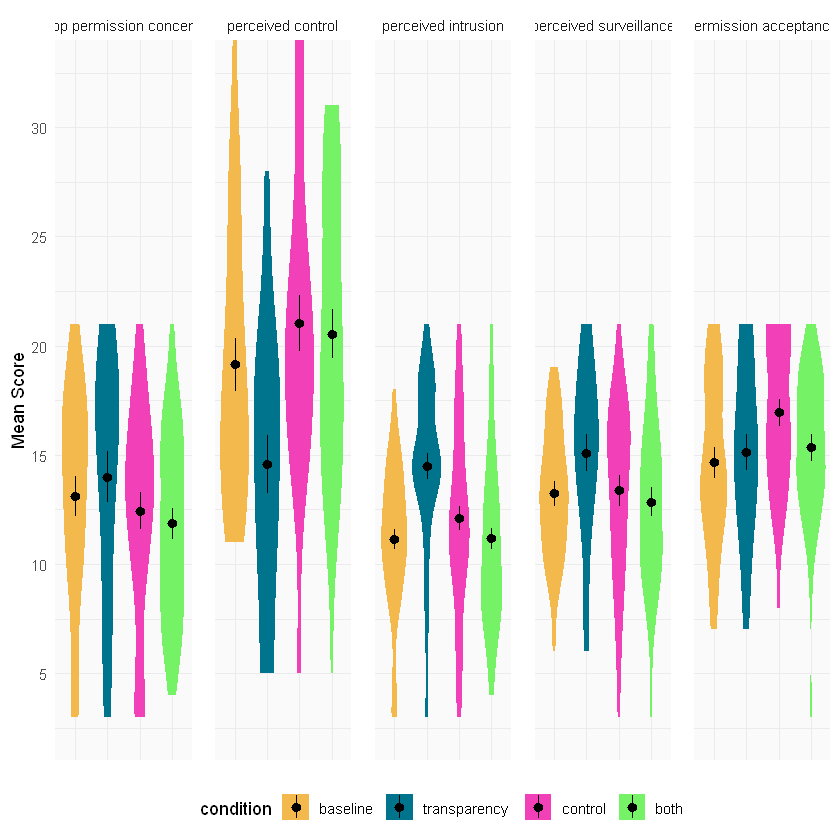

In [15]:
# 6.4 Privacy Concern and User Experience

### Perceived Control
# two way anova
df_perceivedcontrol <- data_postq %>% select(condition,transparency,control,PP_perceived_control)
twoway_anova_test("Privacy Perception: Perceived Control", df_perceivedcontrol,"PP_perceived_control")

### App Permission Concern
# two way anova (see R Console)
df <- data_postq %>% select(condition,transparency,control,PP_app_permission_concern)
twoway_anova_test("Privacy Perception: App Permission Concern", df,"PP_app_permission_concern")

### Perceived Surveillance
# two way anova (see R Console)
df <- data_postq %>% select(condition,transparency,control,PP_perceived_surveillance)
twoway_anova_test("Privacy Perception: Perceived Surveillance", df,"PP_perceived_surveillance")

### Perceived Intrusion
# two way anova (see R Console)
df <- data_postq %>% select(condition,transparency,control,PP_perceived_intrusion)
twoway_anova_test("Privacy Perception: Perceived Intrusion", df,"PP_perceived_intrusion")

### Permission Acceptance
# two way anova (see R Console)
df <- data_postq %>% select(condition,transparency,control,PP_permission_acceptance)
twoway_anova_test("Privacy Perception: Permission Acceptance", df,"PP_permission_acceptance")


### Figure 7: Privacy Perception Violin Plot
means_pp <- data_pp %>% group_by(itemgroup,condition) %>% dplyr::summarize(score=mean(score))

ggplot(data_pp, aes(x = condition, y = score, fill = condition)) +
    geom_violin(color = NA) + 
    stat_summary(fun.data=mean_se,  geom="pointrange", color="black") +
    facet_wrap(~itemgroup, ncol=5) + 
ylab("Mean Score")+
  scale_y_continuous(limits = c(0, 35), breaks=seq(5,35,5) ,expand = c(0,-1)) +
  scale_fill_manual(values = c('#f3b94d','#00748d','#F241B8','#76F266')) +
  theme_minimal() +
  theme(
      legend.position = "bottom", #else bottom
      panel.background = element_rect( size=0.5, color="transparent", fill="gray98" ),
      axis.title.x=element_blank(),
      axis.text.x=element_blank(),
      panel.spacing = unit(0.5, "cm"),
      strip.placement = "outside",
  )